In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [10]:
df = pd.read_csv("lab6.csv")
print(df)

   hours   pass
0      1      0
1      3      0
2      5      1
3      7      1


In [12]:
x = df[['hours']]
y = df[' pass']

In [13]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [15]:
x_new = pd.DataFrame({'hours': [5, 10]})

predictions = model.predict(x_new)
proabilities = model.predict_proba(x_new)[:, 1]

In [17]:
print(f"Predictionscfor 5 hours: {'Pass' if predictions[0] == 1 else 'Fail'} {proabilities[0]:.4f})")
print(f"Predictionscfor 10 hours: {'Pass' if predictions[1] == 1 else 'Fail'} {proabilities[1]:.4f})")

Predictionscfor 5 hours: Pass 0.7156)
Predictionscfor 10 hours: Pass 0.9961)


In [23]:
# Create smooth range of hours
x_range = np.linspace(df['hours'].min(), df['hours'].max(), 300).reshape(-1, 1)
x_range_df = pd.DataFrame(x_range, columns=['hours'])

# Predict probabilities for curve
y_range_prob = model.predict_proba(x_range_df)[:, 1]


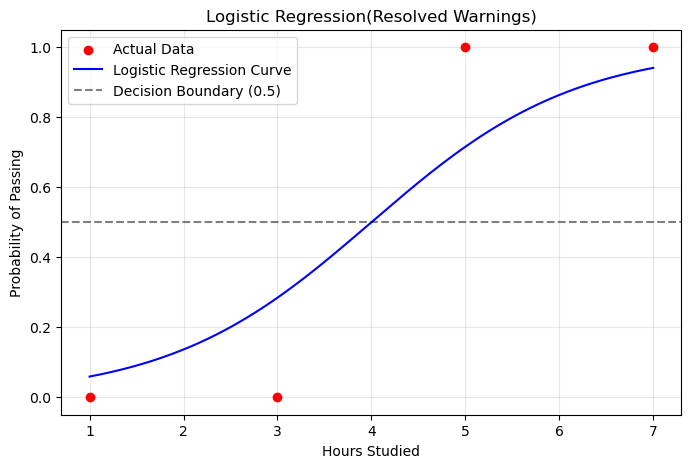

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='red', label='Actual Data', zorder=5)
plt.plot(x_range_df["hours"],y_range_prob,color = "blue", label='Logistic Regression Curve')
plt.axhline(0.5, color='black', linestyle='--', alpha = 0.5, label='Decision Boundary (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression(Resolved Warnings)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()